In [2023]:
%pylab inline
import pandas as pd
import numpy as np
from datetime import datetime
from os.path import join
import os

Populating the interactive namespace from numpy and matplotlib
/Users/itotatsuhiko/.pyenv/versions/3.8.0/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2024]:
from ipywidgets import interact,interact_manual,IntSlider,FloatSlider

In [2025]:
%run customTypes
%run thermocouple
%run pfeiffer
%run ionizationGauge

In [2026]:
desk = join(os.path.expanduser("~"),"Desktop", "Data")
drop = join(os.path.expanduser("~"),"Dropbox", "workspace","data")
# drop = join(os.path.expanduser("~"),"Dropbox", "Experiments","2019-Ito-kun","Data")
drop = join(os.path.expanduser('~'), "Dropbox", "Data")

In [2027]:
dr = drop
temp_dir = os.path.join(dr, "Temperature")
pres1_dir = os.path.join(dr, "Pressure1")
pres2_dir = os.path.join(dr, "Pressure2")

In [2028]:
%run notebooktools.py

In [2029]:
lst = [i for i in sorted(os.listdir(temp_dir)) if i.startswith('out')]
sz = np.array([os.path.getsize(join(temp_dir,i)) for i in lst])
ind = list(np.where(sz>150)[0])
lst = [lst[i] for i in ind]

In [2030]:
""" smoothing savitzky_golay """
# https://plot.ly/python/smoothing/
def savitzky_golay(y, window_size, order):
    ''' smoothing '''
    import numpy as np
    from math import factorial
    from scipy.signal import savgol_filter
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        window_size += 1
    return savgol_filter(y,window_size,order)

In [2031]:
## baking plot

In [2032]:
fname = lst[-8]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

fname

'out_20191227202138.csv'

(8915, 3)
(7420, 3)
(9093, 3)
(8373, 3)


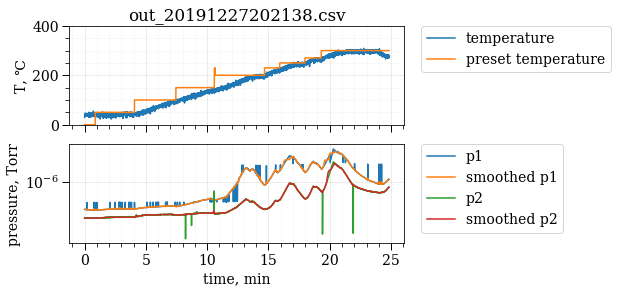

In [2033]:
%run notebooktools.py
font_setup(size=14)
""" temperature """
mask = np.where(t_data[:,0] <= 1490)
t_data = t_data[mask]
t_data = maskTemp(t_data)

""" pressure1 """
mask = np.where(p1_data[:,0] <= 1490)
p1_data = p1_data[mask]
p1_data = maskIonPres(p1_data)
print(p1_data.shape)
p1_data[:, 1] = np.where(p1_data[:, 0] >= 755, p1_data[:, 1]*1e-6, p1_data[:, 1]*1e-7)
mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
p1_data = p1_data[mask]
print(p1_data.shape)

""" pressure2 """
mask = np.where(p2_data[:,0] <= 1490)
p2_data = p2_data[mask]
print(p2_data.shape)
p2_data = maskPfePres(p2_data)
mask = np.where((abs(np.gradient(p2_data[:, 1])) < 5e-9) & (p2_data[:, 1] < 1e-5) & ((p2_data[:, 0] < 800) & (p2_data[:, 1] < 1e-6) | (p2_data[:, 0] >= 800)))
p2_data = p2_data[mask]
print(p2_data.shape)

plt.subplot(2, 1, 1)
plt.plot(t_data[:, 0]/60, t_data[:, 1], label='temperature')
plt.plot(t_data[:, 0]/60, t_data[:, 2], label='preset temperature')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0, 400])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title(fname)

plt.subplot(2, 1, 2)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='p1')
p1_data[:, 1] = savitzky_golay(p1_data[:, 1], 20, 1)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='smoothed p1')

plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='p2')
p2_data[:, 1] = savitzky_golay(p2_data[:, 1], 20, 1)
plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='smoothed p2')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('pressure, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

In [2034]:
fname = lst[-2]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
print(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)


""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

fname

/Users/itotatsuhiko/Dropbox/Data/Temperature/out_20200110_115734.csv


'out_20200110_115734.csv'

(24488, 3)
(24488, 3)


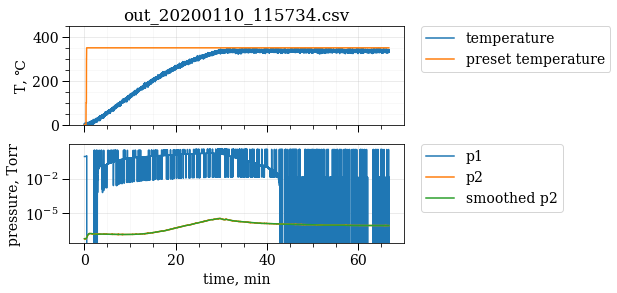

In [2035]:
%run notebooktools.py
font_setup(size=14)
""" temperature """
mask = np.where(t_data[:,0] <= 4000)
t_data = t_data[mask]
t_data = maskTemp(t_data)
# t_data[:, 1] += 20.9

""" pressure1 """
mask = np.where(p1_data[:,0] <= 4000)
p1_data = p1_data[mask]
# p1_data = maskIonPres(p1_data)
print(p1_data.shape)
# p1_data[:, 1] = np.where(p1_data[:, 0] >= 2465, p1_data[:, 1]*1e-7, p1_data[:, 1]*1e-7) # TODO: log scale の計算

# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]
print(p1_data.shape)

""" pressure2 """
mask = np.where(p2_data[:,0] <= 4000)
p2_data = p2_data[mask]
p2_data = maskPfePres(p2_data)

plt.subplot(2, 1, 1)
plt.plot(t_data[:, 0]/60, t_data[:, 1], label='temperature')
plt.plot(t_data[:, 0]/60, t_data[:, 2], label='preset temperature')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0,450])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title(fname)

plt.subplot(2, 1, 2)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='p1')
p1_data[:, 1] = savitzky_golay(p1_data[:, 1], 20, 1)
# plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='smoothed p1')

plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='p2')
p2_data[:, 1] = savitzky_golay(p2_data[:, 1], 20, 1)
plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='smoothed p2')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('pressure, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

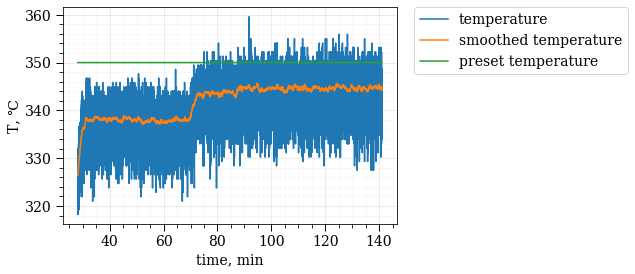

In [2036]:
fr = 10000
to = 50000

t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)
t_data = maskTemp(t_data)

plt.plot(t_data[fr:to, 0]/60, t_data[fr:to, 1], label='temperature')
t_data[:, 1] = savitzky_golay(t_data[:, 1], 200, 1)
plt.plot(t_data[fr:to, 0]/60, t_data[fr:to, 1], label='smoothed temperature')
plt.plot(t_data[fr:to, 0]/60, t_data[fr:to, 2], label='preset temperature')

ticks_visual(gca())
grid_visual(gca())
plt.ylabel('T, ℃')
plt.xlabel('time, min')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)